In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification  
from sklearn.mixture import GaussianMixture

In [9]:
data = pd.read_csv('test_data.csv')
arr= np.array(list(data['a_total_baru']))

In [11]:
model=GaussianMixture(n_components=3)
model.fit(arr.reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
yhat=model.predict(arr.reshape(-1,1))
clusters=np.unique(yhat)

In [34]:
df = pd.DataFrame(data)
df['cluster']=np.array(list(yhat))
df

,Nomor,Klub,dummy_1,dummy_3,dummy_4,Usiatahun,Pendidikanterakhiryangandajalani,dummy_sd,dummy_smp,dummy_s1,dummy_s2,JenisKelamin,dummy_wanita,KTA,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,a_total,a_total_baru,cluster
0,1159.0,3,0,1,0,21,S2,0,0,0,1,Pria,0,0.0,5,5,5,5,5,5,5,5,4,4,5,5,5,63,58,0
1,1102.0,3,0,1,0,26,SMA,0,0,0,0,Pria,0,0.0,5,5,5,5,5,5,5,5,3,4,5,5,5,62,57,0
2,127.0,1,1,0,0,20,SMA,0,0,0,0,Pria,0,0.0,5,5,5,5,5,5,5,5,4,4,4,4,5,61,56,0
3,404.0,2,0,0,0,38,SMA,0,0,0,0,Pria,0,0.0,5,5,5,5,5,5,5,5,4,4,4,4,5,61,56,0
4,818.0,2,0,0,0,20,SMA,0,0,0,0,Pria,0,1.0,5,5,5,5,5,5,5,5,4,4,4,4,5,61,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1029.0,3,0,1,0,21,S1,0,0,1,0,Pria,0,0.0,1,3,1,1,1,1,2,3,1,1,2,3,3,23,22,2
1453,273.0,1,1,0,0,24,S1,0,0,1,0,Pria,0,1.0,2,3,1,3,1,1,3,3,1,1,1,1,1,22,21,2
1454,22.0,1,1,0,0,15,S1,0,0,1,0,Pria,0,0.0,1,2,1,2,1,2,1,2,1,1,1,1,1,17,15,2
1455,909.0,2,0,0,0,21,SMA,0,0,0,0,Pria,0,1.0,1,5,1,1,1,1,1,1,1,1,1,1,1,17,16,2


In [35]:
df.to_csv(r'/test_data1.csv')

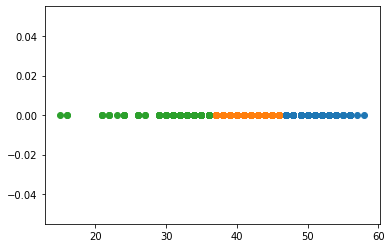

In [42]:
for cluster in clusters:
  row_ix=np.where(yhat==cluster)
  plt.scatter(arr.reshape(-1,1)[row_ix,0],np.zeros(len(arr)).reshape(-1,1)[row_ix,0])
plt.show()